# Outlier detection: A simple demo example

## What is an outlier?

In statistics <a href="https://en.wikipedia.org/wiki/Outlier."> (Source, [Wikipedia]) </a>, an outlier is a data point that differs significantly from other observations.

## Cause of an outlier?

<li>  A physical apparatus for taking measurements may have suffered a transient malfunction </li>
<li>  There may have been an error in data transmission  </li>
<li>  A sample may have been contaminated with elements from outside the population being examined </li>

## What are the criteria to identify an outlier?

<li> IQR </li>
<li> Z-score </li>

`Let us work on a simple dummy dataset so that we can appreciate the power of python to detect outliers that may cause problems later on in analysis of data`

In [1]:
# let us import the necessary libraries 

import numpy as np          # This is a Linear Algebra packages
import seaborn as sb        # This is just a plotting library

In [19]:
# Let us create a dataset (just use rand integers to generate a univariate dataset)

dataset = np.random.randint(1,100,10)    # This generates 10 random integers between 1 to 100

# Detection of Outlier using Z-Score


## $Z = \frac{x_i - \mu}{\sigma}$ 

## Steps to find the outlier using z-score
***
1. Find the mean and standard deviation
2. Find the z-score for all the data points in the dataset
3. If the z-score is above 3 std and below 3 std then it is an outlier

Fig shown below illsutrate this idea

<table><tr>
<td> <img src="images/snd.png" alt="Benign Histopath" style="width: 350px;"/> </td>
</tr> Standard Normal Distribution <a href="https://en.wikipedia.org/wiki/Normal_distribution."> (Source, [Wikipedia]) </a>
</table>

In [27]:
def get_outliers(data):    
    ''' 
    This function detects the outliers from the given data
    input : data [n x 1] dimension (univariate) and [n x p] (multivariate)
    return: outliers
    '''
    outlier = []
    threshold = 3
    mean = np.mean(data)
    std = np.std(data)
    
    for sample in data:
        z = (sample - mean)/std        
        if np.abs(z) > threshold:
            outlier.append(sample)
        
    return outlier   
    

In [28]:
# call the outlier function to find it

print(dataset)                       # let us see the dataset again to be sure 
outliers = get_outliers(dataset)
print(outliers)

[50 52 38 66 33 23 29 25 71 70]
[]


Expected output is a list consisting of outlier. Sometimes the list can be empty as there are no outliers

In [45]:
# Let us create a newdataset that has some large values 

newdataset = [11,10,12,14,12,15,14,13,15,102,12,14,17,19,107,10,13,12,14,12,108,12,11,14,13,15,10,15,12,10,14,13,15,10]
print(newdataset)

[11, 10, 12, 14, 12, 15, 14, 13, 15, 102, 12, 14, 17, 19, 107, 10, 13, 12, 14, 12, 108, 12, 11, 14, 13, 15, 10, 15, 12, 10, 14, 13, 15, 10]


In [46]:
# let us call the get_outlier function again

get_outliers(newdataset)



[102, 107, 108]

# InterQuantile Range
75%- 25% values in a dataset

Steps
1. Arrange the data in increasing order
2. Calculate first(q1) and third quartile(q3)
3. Find interquartile range (q3-q1)
4.Find lower bound q1*1.5
5.Find upper bound q3*1.5
Anything that lies outside of lower and upper bound is an outlier

In [49]:
sorted(newdataset)

[10,
 10,
 10,
 10,
 10,
 11,
 11,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 13,
 13,
 13,
 13,
 14,
 14,
 14,
 14,
 14,
 14,
 15,
 15,
 15,
 15,
 15,
 17,
 19,
 102,
 107,
 108]

In [51]:
Q1, Q3= np.percentile(newdataset,[25,75])
print(Q1,Q3)

12.0 15.0


In [53]:
## Find the IQR

iqr = Q3-Q1
print(iqr)

3.0


In [54]:
## Find the lower bound value and the higher bound value

lower_bound_val = Q1 -(1.5 * iqr) 
upper_bound_val = Q3 +(1.5 * iqr)

In [55]:
print(lower_bound_val,upper_bound_val)


7.5 19.5


In [58]:
outliers = []

for sample in newdataset:
    if sample > upper_bound_val or sample < lower_bound_val:
        outliers.append(sample)

In [61]:
print(outliers)

[102, 107, 108]


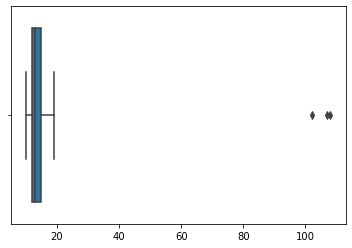

In [62]:
# let us plot the data to visualize it

sb.boxplot(newdataset)

# Now let us work on a real problem with multivariate data

In [63]:
import pandas as pd

In [88]:
# read the data

df = pd.read_csv('data/mtcars.csv')

In [89]:
# let us look at the dataset

df.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [90]:
# let us check the shape of the data

df.shape

(32, 12)

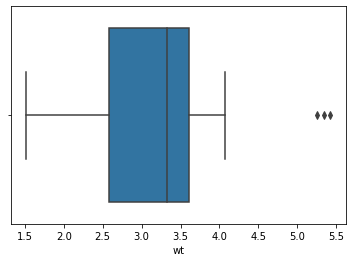

In [95]:
# let us visualize this using boxplot

sb.boxplot(data=df,x=df['wt'])

In [96]:
Q1=df['wt'].quantile(0.25)
Q3=df['wt'].quantile(0.75)
IQR=Q3-Q1
print(Q1)
print(Q3)
print(IQR)
Lower_Whisker = Q1 - 1.5 * IQR
Upper_Whisker = Q3 + 1.5 *IQR
print(Lower_Whisker, Upper_Whisker)

2.58125
3.61
1.02875
1.0381249999999997 5.153125


In [97]:
# apply the condition and remove the outliers
df = df[df['wt']< Upper_Whisker]

In [98]:
# let us check the shape of the data

df.shape

(29, 12)

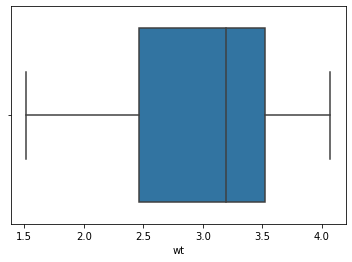

In [100]:
# let us visualize this using boxplot

sb.boxplot(data=df,x=df['wt'])